In [1]:
from requests import Request, Session
from requests.exceptions import ConnectionError, Timeout, TooManyRedirects
import json
import pandas as pd
import numpy as np
import requests
url = 'https://pro-api.coinmarketcap.com/v1/cryptocurrency/listings/latest'
parameter1 = {
  'start':'1',
  'limit':'5000',
  'convert':'USD'
}
parameter2 = {
  'start': '5001',
  'limit': '5000',
  'convert':'USD'
}
headers = {
  'Accepts': 'application/json',
  'X-CMC_PRO_API_KEY': '4d3567db-081b-4381-88c9-2eddc81c0142',
}

session = Session()
session.headers.update(headers)

try:
  response1 = session.get(url, params=parameter1)
  response2 = session.get(url, params=parameter2)
  data1 = json.loads(response1.text)
  data2 = json.loads(response2.text)
except (ConnectionError, Timeout, TooManyRedirects) as e:
  #print(e)
  pass

df1 = pd.json_normalize(data1['data'])
df2 = pd.json_normalize(data2['data'])

df = pd.concat([df1, df2])
df.reset_index(inplace = True, drop=True)
df.sort_values(by='quote.USD.market_cap', axis=0, ascending=False)

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,8099,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.891457e+07,1.891457e+07,...,5.960308,8.771537e+11,40.3843,9.738645e+11,2021-12-30T02:10:07.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,4483,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.189455e+08,1.189455e+08,...,20.321268,4.324993e+11,19.9123,4.324993e+11,2021-12-30T02:10:06.000Z,NaN,NaN,NaN,NaN,NaN
2,1839,Binance Coin,BNB,binance-coin,557,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.668011e+08,1.668011e+08,1.668011e+08,...,32.112251,8.557158e+10,3.9360,8.557158e+10,2021-12-30T02:09:28.000Z,NaN,NaN,NaN,NaN,NaN
3,825,Tether,USDT,tether,20804,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.834488e+10,8.175899e+10,...,-0.004532,7.835671e+10,3.6069,8.177133e+10,2021-12-30T02:09:28.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
200,5015,HEX,HEX,hex,25,2019-12-17T00:00:00.000Z,[],NaN,1.734111e+11,6.335427e+11,...,-14.112744,5.943427e+10,0.0000,2.171381e+11,2021-12-30T02:09:32.000Z,1027.0,Ethereum,ETH,ethereum,0x2b591e99afe9f32eaa6214f7b7629768c40eeb39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4744,10314,DragonBite,BITE,dragonbite,4,2021-06-07T00:00:00.000Z,[],1.000000e+09,0.000000e+00,0.000000e+00,...,-60.016432,0.000000e+00,0.0000,2.107533e+06,2021-12-30T02:10:04.000Z,1027.0,Ethereum,ETH,ethereum,0x4eed0fa8de12d5a86517f214c2f11586ba2ed88d
4743,6487,Kevacoin,KVA,kevacoin,2,2020-08-10T00:00:00.000Z,[mineable],1.050000e+09,0.000000e+00,1.664410e+08,...,-19.541968,0.000000e+00,0.0000,1.059778e+06,2021-12-30T02:10:07.000Z,NaN,NaN,NaN,NaN,NaN
4742,14956,E$P Project,E$P,esp-project,1,2021-11-22T07:27:12.000Z,[],5.000000e+11,0.000000e+00,0.000000e+00,...,-11.144371,0.000000e+00,0.0000,4.000604e+06,2021-12-30T02:10:09.000Z,1027.0,Ethereum,ETH,ethereum,0xEbD880564D73566B7479801eD6c17D1c395deCB4
4741,10902,TruBadger,TRUBGR,trubadger,2,2021-07-15T00:00:00.000Z,[binance-smart-chain],1.000000e+15,0.000000e+00,0.000000e+00,...,-33.101107,0.000000e+00,0.0000,2.479646e+07,2021-12-30T02:10:08.000Z,1839.0,Binance Smart Chain (BEP20),BNB,binance-coin,0xc003F5193CABE3a6cbB56948dFeaAE2276a6AA5E


In [2]:
# note that CLIENT_ID refers to 'personal use script' and SECRET_TOKEN to 'token'
auth = requests.auth.HTTPBasicAuth('K0_sKgQufHwNHik8NI3_oA', 'd7qXIdNZbk6PUoYZxIakLsSlGy6x9A')

# here we pass our login method (password), username, and password
data = {'grant_type': 'password',
        'username': 'CafeKeys',
        'password': '&Uz8kPAWM5ab'}

# setup our header info, which gives reddit a brief description of our app
headers = {'User-Agent': 'MyBot/0.0.1'}

# send our request for an OAuth token
res = requests.post('https://www.reddit.com/api/v1/access_token',
                    auth=auth, data=data, headers=headers)

# convert response to JSON and pull access_token value
TOKEN = res.json()['access_token']

# add authorization to our headers dictionary
headers = {**headers, **{'Authorization': f"bearer {TOKEN}"}}

# while the token is valid (~2 hours) we just add headers=headers to our requests
requests.get('https://oauth.reddit.com/api/v1/me', headers=headers)

<Response [200]>

In [3]:
def reddit_search(query, timeframe, limit):
    # Initial Call
    count = 0
    URL = "https://oauth.reddit.com/search.json?q={}&t={}&limit={}".format(query, timeframe, limit)
    res = requests.get(URL, headers=headers)
    result = res.json()
    after = result['data']['after']
    children = result['data']['children']
    count += len(children)
    # Subsequent Calls
    while after is not None:
        URL = "https://oauth.reddit.com/search.json?q={}&t={}&limit={}&after={}".format(query, timeframe, limit, after)
        res = requests.get(URL, headers=headers)
        result = res.json()
        after = result['data']['after']
        children = result['data']['children']
        count += len(children)
    return count
    
    

In [8]:
limit = 100
timeframe = 'day' #hour, day, week, month, year, all

coin_list = df['name'].unique()
coin_posts = {}
coin_list = ['solana']
for coin in coin_list:
    count = reddit_search(coin, timeframe, limit)
    coin_posts[coin] = count
print(coin_posts)

{'solana': 238}


In [17]:
df[df['quote.USD.market_cap'] >= 10000000]

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.percent_change_90d,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address
0,1,Bitcoin,BTC,bitcoin,8099,2013-04-28T00:00:00.000Z,"[mineable, pow, sha-256, store-of-value, state...",2.100000e+07,1.891457e+07,1.891457e+07,...,5.960308,8.771537e+11,40.3843,9.738645e+11,2021-12-30T02:10:07.000Z,NaN,NaN,NaN,NaN,NaN
1,1027,Ethereum,ETH,ethereum,4483,2015-08-07T00:00:00.000Z,"[mineable, pow, smart-contracts, ethereum-ecos...",NaN,1.189455e+08,1.189455e+08,...,20.321268,4.324993e+11,19.9123,4.324993e+11,2021-12-30T02:10:06.000Z,NaN,NaN,NaN,NaN,NaN
2,1839,Binance Coin,BNB,binance-coin,557,2017-07-25T00:00:00.000Z,"[marketplace, centralized-exchange, payments, ...",1.668011e+08,1.668011e+08,1.668011e+08,...,32.112251,8.557158e+10,3.9360,8.557158e+10,2021-12-30T02:09:28.000Z,NaN,NaN,NaN,NaN,NaN
3,825,Tether,USDT,tether,20804,2015-02-25T00:00:00.000Z,"[payments, stablecoin, asset-backed-stablecoin...",NaN,7.834488e+10,8.175899e+10,...,-0.004532,7.835671e+10,3.6069,8.177133e+10,2021-12-30T02:09:28.000Z,1027.0,Ethereum,ETH,ethereum,0xdac17f958d2ee523a2206206994597c13d831ec7
4,5426,Solana,SOL,solana,201,2020-04-10T00:00:00.000Z,"[pos, platform, solana-ecosystem, cms-holdings...",NaN,3.093490e+08,5.116169e+08,...,20.603477,5.272985e+10,2.4254,8.720728e+10,2021-12-30T02:10:06.000Z,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1073,4757,Robonomics.network,XRT,robonomics-network,14,2019-10-07T00:00:00.000Z,"[iot, polkadot-ecosystem]",NaN,1.067349e+06,9.223747e+06,...,-25.333303,1.011631e+07,0.0000,8.742252e+07,2021-12-30T02:09:27.000Z,1027.0,Ethereum,ETH,ethereum,0x7de91b204c1c737bcee6f000aaa6569cf7061cb7
1074,7805,Muse,MUSE,muse,5,2020-11-29T00:00:00.000Z,[collectibles-nfts],NaN,5.085540e+05,5.085540e+05,...,27.578399,1.005411e+07,0.0000,1.005411e+07,2021-12-30T02:09:21.000Z,1027.0,Ethereum,ETH,ethereum,0xb6ca7399b4f9ca56fc27cbff44f4d2e4eef1fc81
1075,3422,SHPING,SHPING,shping,3,2018-10-10T00:00:00.000Z,[],NaN,1.694233e+09,1.000000e+10,...,326.944023,1.006561e+07,0.0005,5.941102e+07,2021-12-30T02:09:06.000Z,1027.0,Ethereum,ETH,ethereum,0x7c84e62859d0715eb77d1b1c4154ecd6abb21bec
1076,8168,Bao Finance,BAO,bao-finance,13,2021-01-04T00:00:00.000Z,"[yield-farming, alameda-research-portfolio]",NaN,3.406647e+10,5.602710e+11,...,-3.713357,1.003626e+07,0.0000,1.650603e+08,2021-12-30T02:09:33.000Z,1027.0,Ethereum,ETH,ethereum,0x374cb8c27130e2c9e04f44303f3c8351b9de61c1


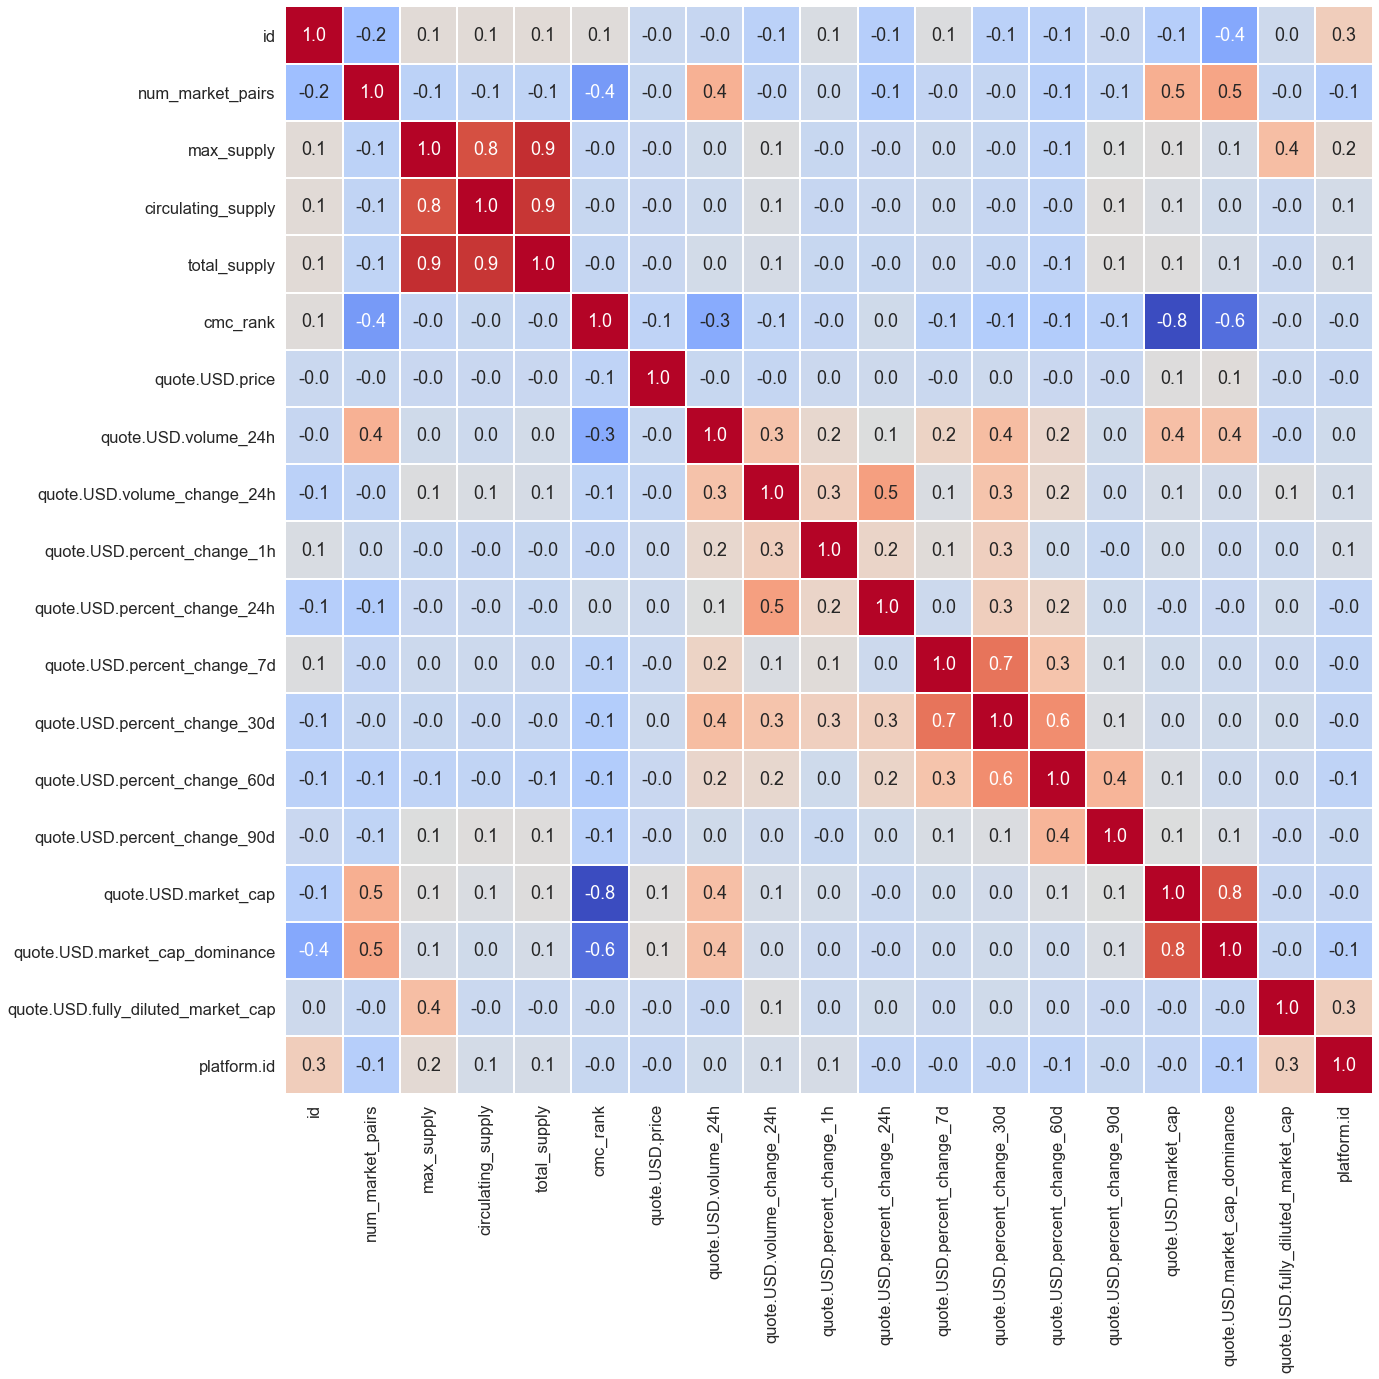

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=1.5)
plt.figure(figsize=(20,20))
sns.heatmap(df[(df['quote.USD.market_cap'] >= 10000000) & (df['quote.USD.market_cap'] <= 1000000000) & (df['num_market_pairs'] > 10)].drop('platform', axis=1).corr(),
            annot=True,
            fmt='.1f',
            cmap='coolwarm',
            square=True,
            linewidths=1,
            cbar=False)
plt.show()

In [37]:
cleaned_df = df[(df['quote.USD.market_cap'] >= 10000000) & (df['quote.USD.market_cap'] <= 1000000000) & (df['num_market_pairs'] > 10)]
def market_cap_categorizer(row):
    if row['quote.USD.market_cap'] <= 100000000:
        row['market_cap_category'] = 0
    elif row['quote.USD.market_cap'] <= 300000000:
        row['market_cap_category'] = 1
    else:
        row['market_cap_category'] = 2
    return row
cleaned_df = cleaned_df.apply(market_cap_categorizer, axis=1)
cleaned_df

,id,name,symbol,slug,num_market_pairs,date_added,tags,max_supply,circulating_supply,total_supply,...,quote.USD.market_cap,quote.USD.market_cap_dominance,quote.USD.fully_diluted_market_cap,quote.USD.last_updated,platform.id,platform.name,platform.symbol,platform.slug,platform.token_address,market_cap_category
91,2099,ICON,ICX,icon,68,2017-10-27T00:00:00.000Z,"[platform, enterprise-solutions, interoperabil...",NaN,6.934086e+08,8.004600e+08,...,9.752443e+08,0.0449,1.125807e+09,2021-12-30T02:10:07.000Z,NaN,NaN,NaN,NaN,NaN,2
92,2700,Celsius,CEL,celsius,42,2018-05-18T00:00:00.000Z,"[lending-borowing, exnetwork-capital-portfolio]",6.956582e+08,2.388635e+08,6.956582e+08,...,9.480765e+08,0.0435,2.761146e+09,2021-12-30T02:09:21.000Z,1027.0,Ethereum,ETH,ethereum,0xaaaebe6fe48e54f431b0c390cfaf0b017d09d42d,2
93,2577,Ravencoin,RVN,ravencoin,80,2018-03-10T00:00:00.000Z,"[mineable, pow, platform, crowdfunding]",2.100000e+10,1.040988e+10,1.040988e+10,...,9.481886e+08,0.0437,1.912795e+09,2021-12-30T02:10:07.000Z,NaN,NaN,NaN,NaN,NaN,2
94,3330,Pax Dollar,USDP,paxos-standard,22,2018-09-27T00:00:00.000Z,"[store-of-value, stablecoin, asset-backed-stab...",NaN,9.456429e+08,9.456429e+08,...,9.458140e+08,0.0435,9.458140e+08,2021-12-30T02:10:06.000Z,1027.0,Ethereum,ETH,ethereum,0x8e870d67f660d95d5be530380d0ec0bd388289e1,2
95,1168,Decred,DCR,decred,53,2016-02-10T00:00:00.000Z,"[mineable, hybrid-pow-pos, blake256, medium-of...",2.100000e+07,1.363070e+07,1.363070e+07,...,9.437206e+08,0.0434,1.453934e+09,2021-12-30T02:10:05.000Z,NaN,NaN,NaN,NaN,NaN,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1066,8799,InsurAce,INSUR,insurace,19,2021-03-15T00:00:00.000Z,"[insurance, ethereum-ecosystem, solana-ecosyst...",1.000000e+08,1.126663e+07,1.000000e+08,...,1.033311e+07,0.0000,9.171429e+07,2021-12-30T02:10:09.000Z,1027.0,Ethereum,ETH,ethereum,0x544c42fbb96b39b21df61cf322b5edc285ee7429,0
1067,1758,TenX,PAY,tenx,21,2017-06-27T00:00:00.000Z,"[medium-of-exchange, fenbushi-capital-portfoli...",NaN,2.052183e+08,2.052183e+08,...,1.027932e+07,0.0005,1.027932e+07,2021-12-30T02:09:27.000Z,1027.0,Ethereum,ETH,ethereum,0xb97048628db6b661d4c2aa833e95dbe1a905b280,0
1073,4757,Robonomics.network,XRT,robonomics-network,14,2019-10-07T00:00:00.000Z,"[iot, polkadot-ecosystem]",NaN,1.067349e+06,9.223747e+06,...,1.011631e+07,0.0000,8.742252e+07,2021-12-30T02:09:27.000Z,1027.0,Ethereum,ETH,ethereum,0x7de91b204c1c737bcee6f000aaa6569cf7061cb7,0
1076,8168,Bao Finance,BAO,bao-finance,13,2021-01-04T00:00:00.000Z,"[yield-farming, alameda-research-portfolio]",NaN,3.406647e+10,5.602710e+11,...,1.003626e+07,0.0000,1.650603e+08,2021-12-30T02:09:33.000Z,1027.0,Ethereum,ETH,ethereum,0x374cb8c27130e2c9e04f44303f3c8351b9de61c1,0
